# 1.Подготовка данных и библиотек

In [2]:
import numpy as np
import kagglehub
import torch
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

/home/rustam/miniconda3/envs/regression/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path = kagglehub.dataset_download("sujithmandala/credit-score-classification-dataset")

In [4]:
print("Path to dataset files:", path)

Path to dataset files: /home/rustam/.cache/kagglehub/datasets/sujithmandala/credit-score-classification-dataset/versions/1


In [5]:
data = pd.read_csv(path+'/Credit Score Classification Dataset.csv')

In [6]:
data

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High


# 2. Первичный анализ данных 

## 2.1 Анализ датасета

In [10]:
data.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [7]:
data.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [9]:
data.describe(include='object')

,Gender,Education,Marital Status,Home Ownership,Credit Score
count,164,164,164,164,164
unique,2,5,2,2,3
top,Female,Bachelor's Degree,Married,Owned,High
freq,86,42,87,111,113


## 2.2 Гипотезы


1) Средний возраст хороших заёмщиков выше, чем у остальных
2) Люди с лучшим образованием имеет более высокий доход
3) Семейные люди с детьми имеют лучший рейтинг, чем холостяки

### Гипотеза 1

In [15]:
print('Средний возраст заёмщиков с высоким рейтингом = ', data[data['Credit Score'] == 'High']['Age'].mean())
print('Средний возраст заёмщиков с средним рейтингом = ', data[data['Credit Score'] == 'Average']['Age'].mean())
print('Средний возраст заёмщиков с низким рейтингом = ', data[data['Credit Score'] == 'Low']['Age'].mean())

Средний возраст заёмщиков с высоким рейтингом =  41.991150442477874
Средний возраст заёмщиков с средним рейтингом =  29.52777777777778
Средний возраст заёмщиков с низким рейтингом =  28.0


<Axes: xlabel='Credit Score'>

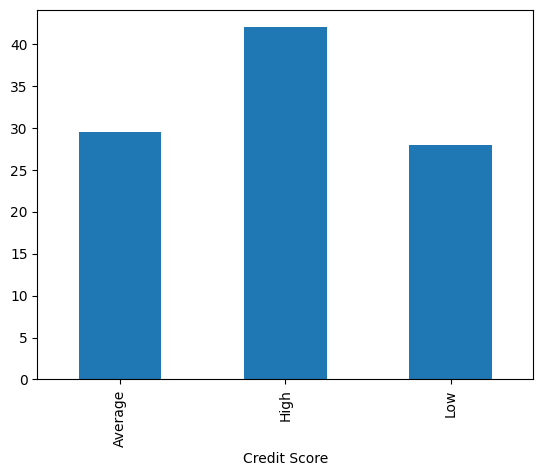

In [60]:
data.groupby(['Credit Score'])['Age'].mean().plot(kind='bar', rot=90)

Гипотеза подтвердилась. Действительно более взрослые люди имеют лучший кредитный рейтинг.

### Гипотеза 2

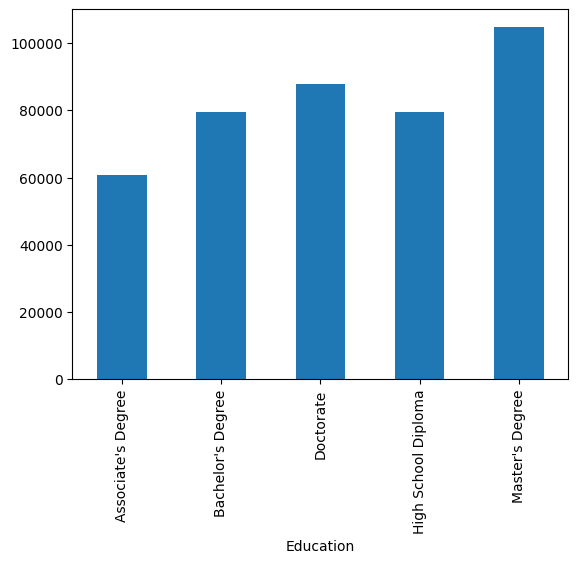

In [59]:
mean_income_by_education = data.groupby(['Education'])['Income'].mean().plot(kind='bar', rot=90)

Гипотеза не подтвердилась. Согласно данным, наибольшим доходом обладают магистры. 

### Гипотеза 3

In [81]:
print('high score percent of married persons with children = ', data[(data['Number of Children'] > 0) & (data['Marital Status'] == 'Married')& (data['Credit Score'] == 'High')].shape[0] / data.shape[0])
print('single person high score = ', data[(data['Marital Status'] == 'Single')& (data['Credit Score'] == 'High')].shape[0] / data.shape[0])

high score percent of married persons with children =  0.39634146341463417
single person high score =  0.17073170731707318


Гипотеза справедлива

# 3 Подготовка данных

In [83]:
data.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


## One-hot encoding

In [94]:
gender_dict = {'Female':0, 'Male': 1}
martial_status = {'Single': 0, 'Married': 1}
home = {'Rented': 0, 'Owned': 1}

In [85]:
data_processed =  data.copy()

In [89]:
data_processed['Gender'] = data_processed['Gender'].map(gender_dict)

In [91]:
data_processed['Marital Status'] = data_processed['Marital Status'].map(martial_status)

In [95]:
data_processed['Home Ownership'] = data_processed['Home Ownership'].map(home) 

In [96]:
data_processed

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,0,50000,Bachelor's Degree,0,0,0,High
1,30,1,100000,Master's Degree,1,2,1,High
2,35,0,75000,Doctorate,1,1,1,High
3,40,1,125000,High School Diploma,0,0,1,High
4,45,0,100000,Bachelor's Degree,1,3,1,High
...,...,...,...,...,...,...,...,...
159,29,0,27500,High School Diploma,0,0,0,Low
160,34,1,47500,Associate's Degree,0,0,0,Average
161,39,0,62500,Bachelor's Degree,1,2,1,High
162,44,1,87500,Master's Degree,0,0,1,High


In [ ]:
data_processed.get_dummies(data_processed['Education'])

AttributeError: 'DataFrame' object has no attribute 'get_dummies'